<a href="https://colab.research.google.com/github/Collin-Campbell/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
sales_list = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [29]:
# Mean 
mean1 = (3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) / 7
mean1

3052.714285714286

In [39]:
# Variance 
variance1 = ((((3505 - mean1)**2) + ((2400 - mean1)**2) + ((3027 - mean1)**2) + 
             ((2798 - mean1)**2) + ((3700 - mean1)**2) + ((3250 - mean1)**2) + 
             ((2689 - mean1)**2)) / (7-1))
variance1

214387.90476190473

In [40]:
# Standard Deviation
standard_deviation1 = variance1**0.5
standard_deviation1

463.0204150595357

In [41]:
def mean(list):
  return (sum(sales_list) / len(sales_list))

In [42]:
mean(sales_list)

3052.714285714286

In [46]:
def variance(list):
  mean = (sum(list) / len(list))
  deviations = [(i - mean)**2 for i in list]
  variance = sum(deviations) / (len(list)-1)
  return variance

In [47]:
variance(sales_list)

214387.90476190473

In [48]:
def standard_deviation(list):
  mean = (sum(list) / len(list))
  deviations = [(i - mean)**2 for i in list]
  variance = sum(deviations) / (len(list)-1)
  standard_deviation = variance**0.5
  return standard_deviation

In [49]:
standard_deviation(sales_list)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [71]:
sales_list

mean_sales = mean(sales_list)

In [72]:
customers_list = [127, 80, 105, 92, 120, 115, 93]

mean_cust = mean(customers_list)

In [58]:
sales_customers = {"sales numbers": sales_list, "number of customers": customers_list}

df = pd.DataFrame(sales_customers)

df

,sales numbers,number of customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [74]:
covariance = ((sales_list[0] - mean_sales)*(customers_list[0] - mean_cust) + (sales_list[1] - mean_sales)*(customers_list[1] - mean_cust) + 
(sales_list[2] - mean_sales)*(customers_list[2] - mean_cust) + (sales_list[3] - mean_sales)*(customers_list[3] - mean_cust) + 
(sales_list[4] - mean_sales)*(customers_list[4] - mean_cust) + (sales_list[5] - mean_sales)*(customers_list[5] - mean_cust) + 
(sales_list[6] - mean_sales)*(customers_list[6] - mean_cust)) / (7-1)

covariance

7604.357142857334

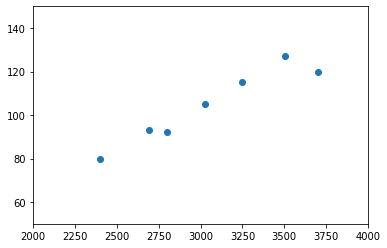

In [63]:
# Large positive covariance is shown in scatter plot

plt.scatter(df["sales numbers"], df["number of customers"])
plt.xlim(2000,4000)
plt.ylim(50,150)
plt.show()

In [59]:
df.cov()

# Covariance values for the two variables match the calculated covariance above

,sales numbers,number of customers
sales numbers,214387.904762,7604.357143
number of customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [68]:
std_sales = standard_deviation(sales_list)
std_customers = standard_deviation(customers_list)

std_customers

17.057326313123664

In [76]:
correlation = covariance / (std_sales * std_customers)

correlation

0.9628339778149151

In [67]:
df.corr()

# Correlation coefficient for the two variables match the calculated correlation coefficient above

,sales numbers,number of customers
sales numbers,1.000000,0.962834
number of customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [78]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [83]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [102]:
titanic = titanic.drop(['name','sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], axis=1 )

In [103]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [104]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

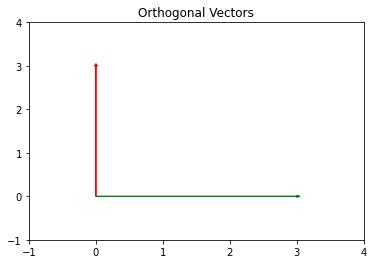

In [88]:
# Perpendicular is a synonym for orthogonal.

vector_1 = [0, 3]
vector_2 = [3, 0]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [96]:
a = np.array([[-5], [3], [7]])

b = np.array([[6], [-8], [2]])

print("Dot product: ", (a * b).sum())
print("Dot product: ", np.dot(a.T[0], b.T[0]))

Dot product:  -40
Dot product:  -40


In [ ]:
# The vectors are NOT orthogonal because their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [105]:
c = ([2, -15, 6, 20])

In [110]:
norm_c = np.linalg.norm(c)

print("Norm squared: ", (norm_c)**2)

Norm squared:  665.0


In [108]:
print("Dot product: ", np.dot(c, c))

Dot product:  665


In [111]:
c_T = ([[2], [-15], [6], [20]])

In [117]:
print(np.matmul(c, c_T))

[665]


In [ ]:
# All these quantities are equivalent.  

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [122]:
d = np.array([[7], [12]])

e = np.array([[2], [11], [-8]])

In [ ]:
# d = 7 i_hat + 12 j_hat

# e = 2 i_hat + 11 j_hat + (-8) k_hat

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [133]:
f = np.array([4, 12, 11, 9, 2])

norm_f = np.linalg.norm(f)

f_hat = (f / norm_f)

print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

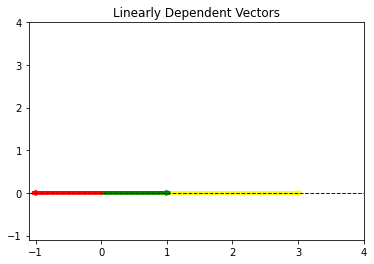

In [134]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

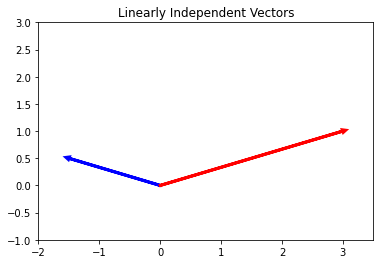

In [135]:
# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [146]:
# h is a multiple of g, meaning the vectors are linearly dependent, so span is 
# just all vectors on that line.  The number of linearly independent vectors in
# the set is one.

import numpy as np

Y = np.array([[1, 2],
              [4, 8]])

np.linalg.matrix_rank(Y)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [142]:
import numpy as np

Z = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

np.linalg.matrix_rank(Z)

# Span of the vectors is equal to rank of the matrix composed of those vectors.
# So, span of {l,m,n} is equal to 3 

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


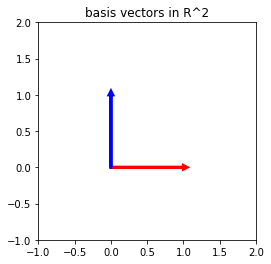

In [147]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# Fix Axes
plt.axes().set_aspect('equal')

# Plot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

When a set of vectors that are linearly independent span a vector space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [140]:
import numpy as np

P = np.matrix([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The number of linearly independent vectors within a matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [152]:
v = np.array([1, 3])
w = np.array([-1, 2])

w_v = np.dot(w, v)
v_v = np.dot(v, v)

proj_L = ((w_v)/(v_v)) * v

proj_L

array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


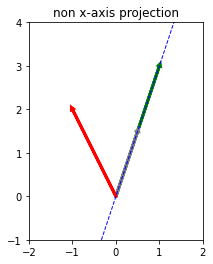

In [155]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [0.5, 1.5]

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

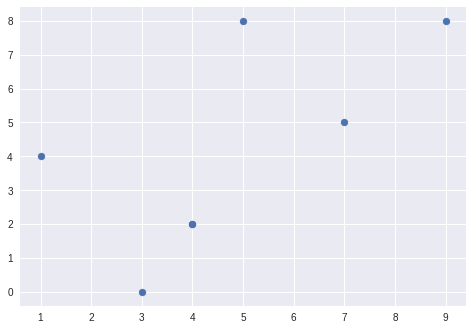

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()